## Getting up

- Turn off alarm
- Get out of bed

## Going to sleep

- Get in bed
- Count sheep

## Odisea en el espacio

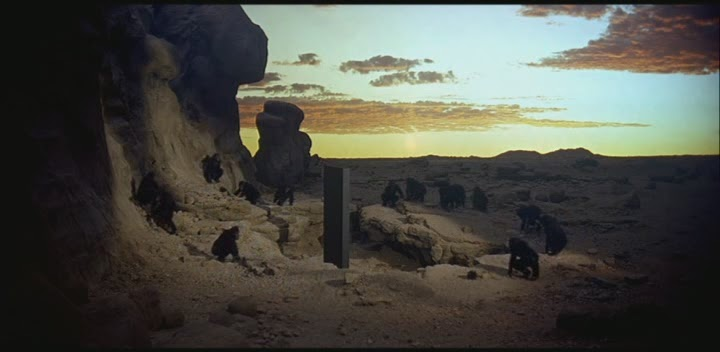

In [2]:
from IPython.display import Image
Image(filename='/Users/alonsosilva/quarto/Odisea.jpg')

## Next token prediction

In [1]:
from IPython.display import IFrame
IFrame("https://alonsosilva-nexttokenprediction.hf.space", width=700, height=700)